# IMPORT LIBRARIES

In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings


# READ DATASET


In [158]:
df1=pd.read_csv("/content/train1.txt",header=None)
df1. columns = ['Input1 ','Input2' ,'Target']
df1. head()

,Input1,Input2,Target
0,0.900260,0.165580,1
1,-0.537720,-0.153010,0
2,0.213690,0.031024,1
3,-0.028035,-0.332100,0
4,0.782600,-0.134190,1


In [159]:
df1['Target'].unique()

array([1, 0])

In [160]:
df1.dtypes

Input1     float64
Input2     float64
Target       int64
dtype: object

In [161]:
df1.shape


(100, 3)

In [162]:
df2=pd.read_csv("/content/train2.txt",header=None)
df2.columns = ['Input1 ','Input2' ,'Target']
df2.head()

,Input1,Input2,Target
0,0.900260,0.165580,1
1,-0.537720,-0.153010,0
2,0.213690,0.031024,1
3,-0.028035,-0.332100,0
4,0.782600,-0.134190,1


In [163]:
df2['Target'].unique()

array([1, 0])

In [164]:
df2.dtypes

Input1     float64
Input2     float64
Target       int64
dtype: object

In [165]:
df2.shape

(100, 3)

In [166]:
df3=pd.read_csv("/content/train3.txt",header=None)
df3.columns = ['Input1 ','Input2' ,'Target']
df3.head()

,Input1,Input2,Target
0,0.900260,0.165580,1
1,-0.537720,-0.153010,0
2,0.213690,0.031024,1
3,-0.028035,-0.332100,1
4,0.782600,-0.134190,1


In [167]:
df3['Target'].unique()

array([1, 0])

In [168]:
df3.dtypes

Input1     float64
Input2     float64
Target       int64
dtype: object

In [169]:
df3.shape

(100, 3)

#DF1
##APPLYING KNN,SVM,PCA

In [170]:
X = df1[['Input1 ', 'Input2']]
y = df1['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy for df1:", accuracy)

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy for df1:", accuracy)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train, y_train)
y_pred = knn_pca.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN with PCA Accuracy for df1:", accuracy)


KNN Accuracy for df1: 1.0
SVM Accuracy for df1: 1.0
KNN with PCA Accuracy for df1: 1.0


In [171]:
error = 1-accuracy
cm = confusion_matrix(y_test, y_pred)

print(f"Classification Accuracy of {knn} is:", accuracy)
print(f"Classification Error of {knn} is: {error:.02f}" )
print(f"Confusion Matrix of {knn} is: " )
print(cm)


print(f"Classification Accuracy of {svm} is:", accuracy)
print(f"Classification Error of {svm} is: {error:.02f}" )
print(f"Confusion Matrix of {svm} is: " )
print(cm)


print(f"Classification Accuracy of {knn_pca} is:", accuracy)
print(f"Classification Error of {knn_pca} is: {error:.02f}" )
print(f"Confusion Matrix of {knn_pca} is: " )
print(cm)


Classification Accuracy of KNeighborsClassifier() is: 1.0
Classification Error of KNeighborsClassifier() is: 0.00
Confusion Matrix of KNeighborsClassifier() is: 
[[ 9  0]
 [ 0 11]]
Classification Accuracy of SVC() is: 1.0
Classification Error of SVC() is: 0.00
Confusion Matrix of SVC() is: 
[[ 9  0]
 [ 0 11]]
Classification Accuracy of KNeighborsClassifier() is: 1.0
Classification Error of KNeighborsClassifier() is: 0.00
Confusion Matrix of KNeighborsClassifier() is: 
[[ 9  0]
 [ 0 11]]


##REDUCING THE NUMBER OF FEATURES FROM 2 TO 1.AND TEST THE PERFORMANCE

In [172]:
pca1 = PCA(n_components=1)
X_pca = pca1.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
knn_pca1 = KNeighborsClassifier()
knn_pca1.fit(X_train, y_train)
y_pred = knn_pca1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN with PCA Accuracy for df1 (1 feature):", accuracy)

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
svm_pca = KNeighborsClassifier()
svm_pca.fit(X_train, y_train)
y_pred = svm_pca.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM with PCA Accuracy for df1 (1 feature):", accuracy)




KNN with PCA Accuracy for df1 (1 feature): 0.95
SVM with PCA Accuracy for df1 (1 feature): 0.95


In [173]:
error = 1-accuracy
cm = confusion_matrix(y_test, y_pred)
print(f"KNN with PCA Accuracy for df1 (1 feature) {knn_pca1} is:", accuracy)
print(f"KNN with PCA Error for df1 (1 feature) {knn_pca1} is: {error:.02f}" )
print(f"Confusion Matrix of {knn_pca1} is: " )
print(cm)

print(f"svm with PCA Accuracy for df1 (1 feature) {svm_pca} is:", accuracy)
print(f"KNN with PCA Error for df1 (1 feature) {svm_pca} is: {error:.02f}" )
print(f"Confusion Matrix of {svm_pca} is: " )
print(cm)

KNN with PCA Accuracy for df1 (1 feature) KNeighborsClassifier() is: 0.95
KNN with PCA Error for df1 (1 feature) KNeighborsClassifier() is: 0.05
Confusion Matrix of KNeighborsClassifier() is: 
[[ 9  0]
 [ 1 10]]
svm with PCA Accuracy for df1 (1 feature) KNeighborsClassifier() is: 0.95
KNN with PCA Error for df1 (1 feature) KNeighborsClassifier() is: 0.05
Confusion Matrix of KNeighborsClassifier() is: 
[[ 9  0]
 [ 1 10]]


#DF2
##APPLYING KNN,SVM,PCA

In [174]:
X = df2[['Input1 ', 'Input2']]
y = df2['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy for df2:", accuracy)

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy for df2:", accuracy)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train, y_train)
y_pred = knn_pca.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN with PCA Accuracy for df2:", accuracy)

KNN Accuracy for df2: 0.9
SVM Accuracy for df2: 0.9
KNN with PCA Accuracy for df2: 0.9


In [175]:
error = 1-accuracy
cm = confusion_matrix(y_test, y_pred)

print(f"Classification Accuracy of {knn} is:", accuracy)
print(f"Classification Error of {knn} is: {error:.02f}" )
print(f"Confusion Matrix of {knn} is: " )
print(cm)


print(f"Classification Accuracy of {svm} is:", accuracy)
print(f"Classification Error of {svm} is: {error:.02f}" )
print(f"Confusion Matrix of {svm} is: " )
print(cm)


print(f"Classification Accuracy of {knn_pca} is:", accuracy)
print(f"Classification Error of {knn_pca} is: {error:.02f}" )
print(f"Confusion Matrix of {knn_pca} is: " )
print(cm)

Classification Accuracy of KNeighborsClassifier() is: 0.9
Classification Error of KNeighborsClassifier() is: 0.10
Confusion Matrix of KNeighborsClassifier() is: 
[[9 2]
 [0 9]]
Classification Accuracy of SVC() is: 0.9
Classification Error of SVC() is: 0.10
Confusion Matrix of SVC() is: 
[[9 2]
 [0 9]]
Classification Accuracy of KNeighborsClassifier() is: 0.9
Classification Error of KNeighborsClassifier() is: 0.10
Confusion Matrix of KNeighborsClassifier() is: 
[[9 2]
 [0 9]]


##REDUCING THE NUMBER OF FEATURES FROM 2 TO 1.AND TEST THE PERFORMANCE

In [176]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train, y_train)
y_pred = knn_pca.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN with PCA Accuracy for df2 (1 feature):", accuracy)

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
svm_pca = KNeighborsClassifier()
svm_pca.fit(X_train, y_train)
y_pred = svm_pca.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM with PCA Accuracy for df2 (1 feature):", accuracy)


KNN with PCA Accuracy for df2 (1 feature): 0.85
SVM with PCA Accuracy for df2 (1 feature): 0.85


In [177]:
error = 1-accuracy
cm = confusion_matrix(y_test, y_pred)
print(f"KNN with PCA Accuracy for df1 (1 feature) {knn_pca} is:", accuracy)
print(f"KNN with PCA Error for df1 (1 feature) {knn_pca} is: {error:.02f}" )
print(f"Confusion Matrix of {knn_pca} is: " )
print(cm)

print(f"svm with PCA Accuracy for df1 (1 feature) {svm_pca} is:", accuracy)
print(f"KNN with PCA Error for df1 (1 feature) {svm_pca} is: {error:.02f}" )
print(f"Confusion Matrix of {svm_pca} is: " )
print(cm)

KNN with PCA Accuracy for df1 (1 feature) KNeighborsClassifier() is: 0.85
KNN with PCA Error for df1 (1 feature) KNeighborsClassifier() is: 0.15
Confusion Matrix of KNeighborsClassifier() is: 
[[9 2]
 [1 8]]
svm with PCA Accuracy for df1 (1 feature) KNeighborsClassifier() is: 0.85
KNN with PCA Error for df1 (1 feature) KNeighborsClassifier() is: 0.15
Confusion Matrix of KNeighborsClassifier() is: 
[[9 2]
 [1 8]]


#DF3
##APPLYING KNN,SVM,PCA

In [178]:
X = df3[['Input1 ', 'Input2']]
y = df3['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy for df3:", accuracy)

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy for df3:", accuracy)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train, y_train)
y_pred = knn_pca.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN with PCA Accuracy for df3:", accuracy)

KNN Accuracy for df3: 0.95
SVM Accuracy for df3: 0.95
KNN with PCA Accuracy for df3: 0.95


In [179]:
error = 1-accuracy
cm = confusion_matrix(y_test, y_pred)

print(f"Classification Accuracy of {knn} is:", accuracy)
print(f"Classification Error of {knn} is: {error:.02f}" )
print(f"Confusion Matrix of {knn} is: " )
print(cm)


print(f"Classification Accuracy of {svm} is:", accuracy)
print(f"Classification Error of {svm} is: {error:.02f}" )
print(f"Confusion Matrix of {svm} is: " )
print(cm)


print(f"Classification Accuracy of {knn_pca} is:", accuracy)
print(f"Classification Error of {knn_pca} is: {error:.02f}" )
print(f"Confusion Matrix of {knn_pca} is: " )
print(cm)

Classification Accuracy of KNeighborsClassifier() is: 0.95
Classification Error of KNeighborsClassifier() is: 0.05
Confusion Matrix of KNeighborsClassifier() is: 
[[ 8  0]
 [ 1 11]]
Classification Accuracy of SVC() is: 0.95
Classification Error of SVC() is: 0.05
Confusion Matrix of SVC() is: 
[[ 8  0]
 [ 1 11]]
Classification Accuracy of KNeighborsClassifier() is: 0.95
Classification Error of KNeighborsClassifier() is: 0.05
Confusion Matrix of KNeighborsClassifier() is: 
[[ 8  0]
 [ 1 11]]


##REDUCING THE NUMBER OF FEATURES FROM 2 TO 1.AND TEST THE PERFORMANCE

In [180]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train, y_train)
y_pred = knn_pca.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN with PCA Accuracy for df3 (1 feature):", accuracy)

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
svm_pca = KNeighborsClassifier()
svm_pca.fit(X_train, y_train)
y_pred = svm_pca.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM with PCA Accuracy for df3 (1 feature):", accuracy)


KNN with PCA Accuracy for df3 (1 feature): 0.9
SVM with PCA Accuracy for df3 (1 feature): 0.9


In [181]:
error = 1-accuracy
cm = confusion_matrix(y_test, y_pred)
print(f"KNN with PCA Accuracy for df1 (1 feature) {knn_pca1} is:", accuracy)
print(f"KNN with PCA Error for df1 (1 feature) {knn_pca1} is: {error:.02f}" )
print(f"Confusion Matrix of {knn_pca1} is: " )
print(cm)

print(f"svm with PCA Accuracy for df1 (1 feature) {svm_pca} is:", accuracy)
print(f"KNN with PCA Error for df1 (1 feature) {svm_pca} is: {error:.02f}" )
print(f"Confusion Matrix of {svm_pca} is: " )
print(cm)

KNN with PCA Accuracy for df1 (1 feature) KNeighborsClassifier() is: 0.9
KNN with PCA Error for df1 (1 feature) KNeighborsClassifier() is: 0.10
Confusion Matrix of KNeighborsClassifier() is: 
[[ 8  0]
 [ 2 10]]
svm with PCA Accuracy for df1 (1 feature) KNeighborsClassifier() is: 0.9
KNN with PCA Error for df1 (1 feature) KNeighborsClassifier() is: 0.10
Confusion Matrix of KNeighborsClassifier() is: 
[[ 8  0]
 [ 2 10]]


#MERGING DIFFERENT DATASET TO CHECK THE MODEL PERFORMANCE

In [182]:
df1.columns = ['Input1', 'Input2', 'Target']
df2.columns = ['Input1', 'Input2', 'Target']
df3.columns = ['Input1', 'Input2', 'Target']
merged_df = pd.concat([df1, df2, df3], ignore_index=True)
accuracy_scores = []
for i in range(1, 4):

    data = merged_df.head(len(df1)*i)
    X = data[['Input1', 'Input2']]
    y = data['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    accuracy = knn.score(X_test, y_test)
    accuracy_scores.append(accuracy)
    print(f"Accuracy after merging dataset {i}: {accuracy}")




Accuracy after merging dataset 1: 1.0
Accuracy after merging dataset 2: 0.925
Accuracy after merging dataset 3: 0.9166666666666666


In [183]:
merged_df.head()

,Input1,Input2,Target
0,0.900260,0.165580,1
1,-0.537720,-0.153010,0
2,0.213690,0.031024,1
3,-0.028035,-0.332100,0
4,0.782600,-0.134190,1


In [184]:
merged_df.shape

(300, 3)

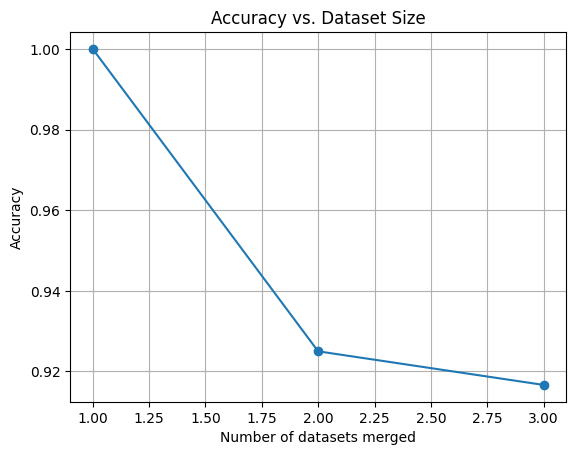

In [185]:
plt.plot(range(1, 4), accuracy_scores, marker='o')
plt.xlabel('Number of datasets merged')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Dataset Size')
plt.grid(True)
plt.show()